!pip install yfinance
!pip install 

In [97]:
import yfinance as yf

In [91]:
print(yf.version)

<module 'yfinance.version' from '/Users/emily/miniconda3/lib/python3.8/site-packages/yfinance/version.py'>


In [68]:
#import yahoo_fin.stock_info as si
import yf.info as si
import pandas as pd
from io import BytesIO

with open("companies.txt") as file:
    lines = file.readlines()
    companyList = [line.rstrip() for line in lines]

stockData = {}

# writer = pd.ExcelWriter('/path_to_save/output.xlsx')
sum_df=pd.DataFrame()

for ticker in companyList:
    try:
        stockData[ticker] = si.get_data(ticker, start_date="01/01/2010", end_date="01/03/2020", interval="1mo")
        sum_df = sum_df.append(stockData[ticker])
    except:
        continue

sum_df.to_excel("output.xlsx") 

ModuleNotFoundError: No module named 'yf'

# Data Import

In [99]:
# imports & formatting
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from   sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from   sklearn.model_selection import cross_val_score
from scipy import optimize

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

full_DS = pd.read_csv("sharpeDS.csv")
full_DS

,date,open,high,low,close,adjclose,volume,ticker,monthly_return,name,sector,month
0,2010-01-01,26.000362,27.247843,25.376621,25.400612,19.294617,259719884,ABT,NaN,Abbott Laboratories,Health Care,1
1,2010-02-01,25.482178,26.389000,25.271067,26.043545,19.927471,303364943,ABT,3.279954,Abbott Laboratories,Health Care,2
2,2010-03-01,26.086725,26.652889,25.050358,25.275864,19.340067,402914340,ABT,-2.947711,Abbott Laboratories,Health Care,3
3,2010-04-01,25.333441,25.549351,23.706919,24.546568,18.782045,361812837,ABT,-2.885313,Abbott Laboratories,Health Care,4
4,2010-05-01,24.685711,24.752882,21.715748,22.819288,17.607489,436325761,ABT,-6.253615,Abbott Laboratories,Health Care,5
...,...,...,...,...,...,...,...,...,...,...,...,...
58241,2019-12-01,314.589996,323.799988,307.130005,321.859985,311.367798,1285175800,SPY,2.402082,S&P 500,All,12
58242,2019-12-01,314.589996,323.799988,307.130005,321.859985,311.367798,1285175800,SPY,2.402082,S&P 500,All,12
58243,2020-01-01,323.540009,332.950012,320.359985,321.730011,312.772308,1392003800,SPY,0.451078,S&P 500,All,1
58244,2020-01-01,323.540009,332.950012,320.359985,321.730011,312.772308,1392003800,SPY,0.451078,S&P 500,All,1


In [101]:
round(full_DS.describe(),3)

,open,high,low,close,adjclose,volume,monthly_return,month
count,58246.000,58246.000,58246.000,58246.000,58246.000,5.824600e+04,57743.000,58246.000
mean,80.668,85.371,76.578,81.427,74.622,1.300829e+08,1.506,6.465
std,132.960,141.309,126.632,134.734,134.364,4.540038e+08,7.733,3.474
min,0.760,0.920,0.650,0.760,0.760,0.000000e+00,-67.405,1.000
25%,32.140,34.170,30.390,32.410,27.120,2.379628e+07,-2.750,3.000
50%,53.440,56.450,50.640,53.820,46.878,4.823550e+07,1.527,6.000
75%,88.497,93.260,84.370,89.328,80.770,1.053325e+08,5.606,9.000
max,3777.000,4058.000,3696.540,3816.970,3816.970,1.808265e+10,190.419,12.000


Text(0, 0.5, 'Monthly Return')

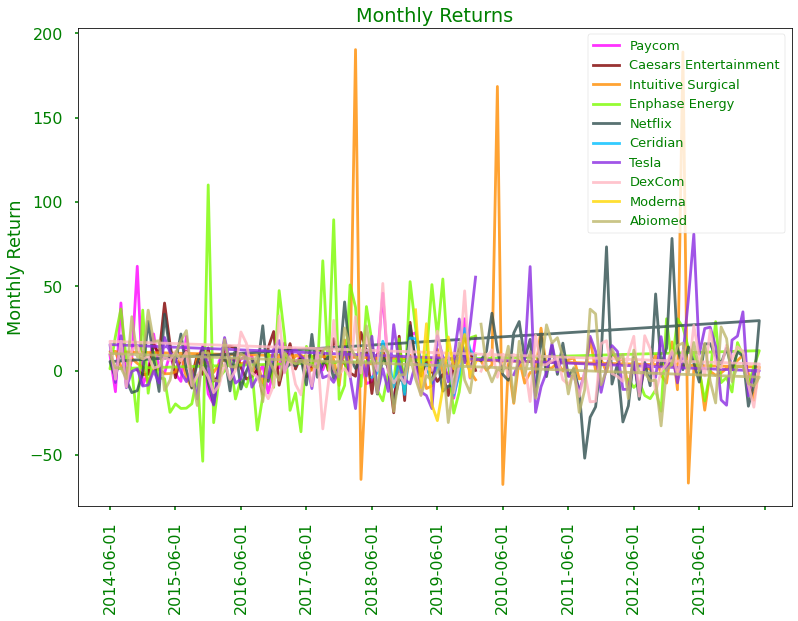

In [102]:
# Data Viz - Select time series for top performers, Plot time series for top performers - Cindy
full_DS = full_DS.dropna()
avg_monthly_returns = full_DS.groupby('name')['monthly_return'].agg(np.mean)
top10 = avg_monthly_returns.nlargest(n=10)

#plot top10asdf
top10
colorList = colorList=["fuchsia","maroon","darkorange","lawngreen","darkslategray","deepskyblue","blueviolet","lightpink","gold","darkkhaki"]
i=0
for comp in (top10.index.values):
  plt.plot(full_DS[full_DS['name'] == comp].date, full_DS[full_DS['name'] == comp].monthly_return, label = comp, alpha=.8, color=colorList[i])
  i += 1

plt.legend(prop={'size': 13})
plt.xticks(np.arange(0, 132, 12),rotation=90)
plt.title('Monthly Returns')
plt.ylabel('Monthly Return')

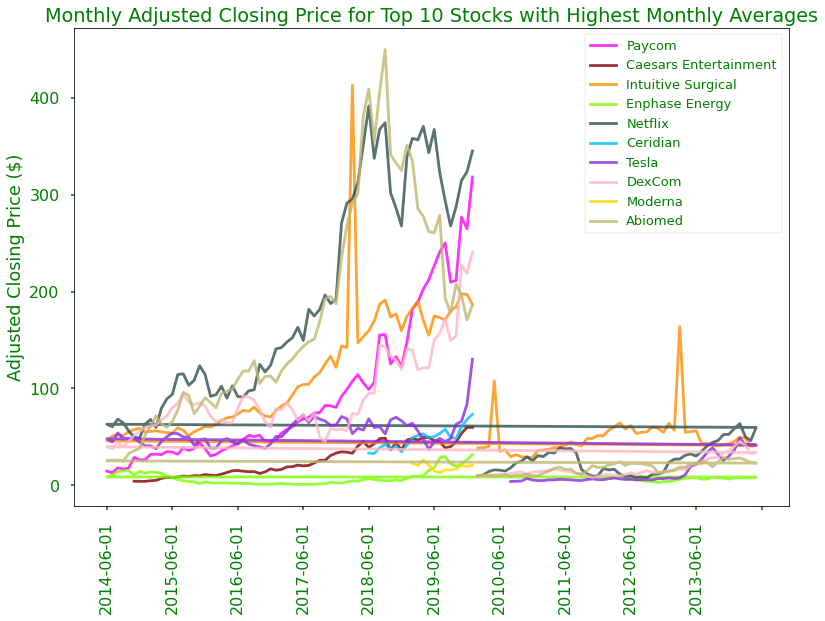

In [103]:
# price data viz
i=0
for comp in (top10.index.values):
    plt.plot(full_DS[full_DS['name'] == comp].date, full_DS[full_DS['name'] == comp].adjclose, label = comp, alpha=.8, color=colorList[i])
    i += 1
    
plt.legend(prop={'size': 13})
plt.xticks(np.arange(0, 132, 12),rotation=90)
plt.title('Monthly Adjusted Closing Price for Top 10 Stocks with Highest Monthly Averages')
plt.ylabel('Adjusted Closing Price ($)');

In [122]:
# correlation matrix of top 10 companies
# full_DS.groupby('name')
# corr_df = full_DS.corr(method='pearson')
# sns.heatmap(corr_df, annot=True)
df_corr_subset = full_DS.loc[full_DS['name'].isin(top10.index.values)].reset_index()
df_corr_subset = df_corr_subset[['date','ticker','adjclose']]
df_corr_subset.head()
# = df_corr_subset.pivot('date','ticker','adjclose').reset_index()
#df_pivot.head()


,date,ticker,adjclose
0,2010-02-01,ABMD,10.11
1,2010-03-01,ABMD,10.32
2,2010-04-01,ABMD,9.64
3,2010-05-01,ABMD,9.75
4,2010-06-01,ABMD,9.68


In [121]:
#just copied code

# imports & formatting
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from   sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from   sklearn.model_selection import cross_val_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.style.use('seaborn-poster')

finalOutput = pd.read_csv('sharpeDS.csv')
round(finalOutput.describe(),3)

colorList=["black","fuchsia","maroon","darkorange","lawngreen","darkslategray","deepskyblue","blueviolet","lightpink","gold","darkkhaki","darkgoldenrod"]
i=0

x=3
topx = avg_monthly_returns.nlargest(n=x)
top10_names = topx.index
names = set()
for i in top10_names:
  names.add(i)
names







colorList=["black","fuchsia","maroon","darkorange","lawngreen","darkslategray","deepskyblue","blueviolet","lightpink","gold","darkkhaki","darkgoldenrod"]
i=0

p = finalOutput[finalOutput['name'].isin(names)].sort_values[by='date'].groupby(['name','date']).mean().reset_index()
for sec in p.name.unique():
    plt.plot(p[p['name'] == sec].date, p[p['name'] == sec].adjclose, label = sec, alpha=.8)
    i+=1
    
plt.legend(prop={'size': 13})
plt.xticks(np.arange(0, 132, 12),rotation=90)
plt.title('Monthly Adjusted Closing Price by Top Earning Companies from 2010 to 2020')
plt.ylabel('Adjusted Closing Price ($)');

SyntaxError: invalid syntax (1315667450.py, line 42)

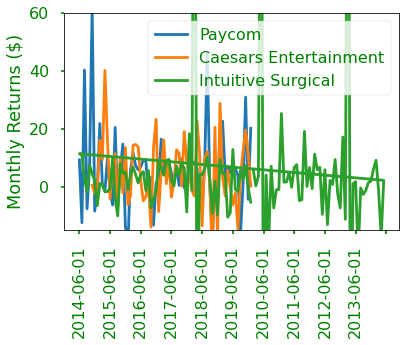

In [109]:
import matplotlib as mpl

%matplotlib inline

# Further data viz - Darren
x=3
topx = avg_monthly_returns.nlargest(n=x)
top10_names = topx.index
names = set()
for i in top10_names:
  names.add(i)
names
top10_fr = full_DS[['name', 'date', 'monthly_return']].loc[full_DS['name'].isin(names)]
top10_monthly_returns = top10_fr.groupby(['name','date'])['monthly_return'].agg(np.mean)


top10_monthly_returns
for name in names:
  plt.plot(top10_monthly_returns[name], label=name)
plt.legend()
plt.ylim((-15,60))

plt.xticks(np.arange(0, 132, 12),rotation=90)

plt.ylabel('Monthly Returns ($)')

COLOR = 'green'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

plt.savefig("vis.png")

In [112]:
# Write Sharpe ratio function - Ben
def sharpe_ratio(periodic_weights, periodic_returns, periodic_riskfree):
  """ 
    periodic_returns - dataframe containing the daily / monthly periodic returns (end of period - start of period) / start of period prices for multiple periods
    periodic_weights - weight vector for multiple periods each weight vector should sum to 1
    periodic_riskfree - risk free ratio
  """
  mark_returns = [np.dot(periodic_weights[i], periodic_returns[i]) for i in range(periodic_returns.length)]

  risk_rate = periodic_riskfree / 100

  er, sd = np.average(mark_returns), np.std(mark_returns)

  monthly_sharpe_ratio = (er - risk_rate) / sd

  annualized_sharpe_ratio = (8.279)**(1/2) * monthly_sharpe_ratio
  return (monthly_sharpe_ratio, annualized_sharpe_ratio)



# Model Creation

In [53]:
class MarkowitzModel:
  def __init__(self, num_assets, periodic_returns, risk_free):
    self.winit = np.repeat(1.0/num_assets, num_assets)
    self.periodic_returns = periodic_returns
    self.risk_free = risk_free
    pass

  def constraint(x):
    A= np.ones(x.shape)
    b=1
    constraintVal = np.matmul(A,x.T)-b 
    return constraintVal

  def bounds(self):
    return tuple([(0,1) for x in self.winit])

  def maximize(self): 
    opt = optimize.minimize(sharpe_ratio, x0 = model.winit, args = \
                            (self.periodic_returns, self.risk_free), method = 'SLSQP', 
                             bounds = model.bounds(), constraints = model.constraint, tol = 10**-3)

  


model = MarkowitzModel(500, )
weights = []



for i in range(num_months): # Run the backtest and collect weights
    #for one month get its all 500 companies monthly returns ex. get array with 2010-02-01
    
    weights.append(model.)







TypeError: __init__() missing 1 required positional argument: 'num_assets'